In [281]:
import pandas as pd
  
# Read a text file to a dataframe using  delimiters
thyroid =  pd.read_table("C:/Users/mindstix/Downloads/thyroid0387.data", delimiter=",", header=None)
 
print(thyroid)

      0  1  2  3  4  5  6  7  8  9   ... 20   21 22    23 24  25 26  27  \
0     29  F  f  f  f  f  f  f  f  t  ...  f    ?  f     ?  f   ?  f   ?   
1     29  F  f  f  f  f  f  f  f  f  ...  t  128  f     ?  f   ?  f   ?   
2     41  F  f  f  f  f  f  f  f  f  ...  f    ?  f     ?  f   ?  t  11   
3     36  F  f  f  f  f  f  f  f  f  ...  f    ?  f     ?  f   ?  t  26   
4     32  F  f  f  f  f  f  f  f  f  ...  f    ?  f     ?  f   ?  t  36   
...   .. .. .. .. .. .. .. .. .. ..  ... ..  ... ..   ... ..  .. ..  ..   
9167  56  M  f  f  f  f  f  f  f  f  ...  t   64  t  0.83  t  77  f   ?   
9168  22  M  f  f  f  f  f  f  f  f  ...  t   91  t  0.92  t  99  f   ?   
9169  69  M  f  f  f  f  f  f  f  f  ...  t  113  t  1.27  t  89  f   ?   
9170  47  F  f  f  f  f  f  f  f  f  ...  t   75  t  0.85  t  88  f   ?   
9171  31  M  f  f  f  f  f  f  f  t  ...  t   66  t  1.02  t  65  f   ?   

         28            29  
0     other  -[840801013]  
1     other  -[840801014]  
2     other  -[

In [11]:
len(thyroid.columns)

30

###Dataset-
The dataset consists of 30 columns - 29 features and the last column has both labels and patient id. 
Patient id is not required for classification. 
Label column is separated and stored as ‘target’ in the dataframe.

In [282]:
thyroid[['target', 'id']] = thyroid[29].apply(lambda x: pd.Series(str(x).split("[")))


In [283]:
y=thyroid['target']

In [284]:
x=thyroid.drop(['id',29], axis=1)

In [292]:
x.drop('target',axis=1,inplace=True)

In [293]:
x.columns=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source'
       ]

In [518]:
y[1501]

'F'

In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  9172 non-null   int64 
 1   sex                  9172 non-null   object
 2   on_thyroxine         9172 non-null   object
 3   query_on_thyroxine   9172 non-null   object
 4   on_antithyroid_meds  9172 non-null   object
 5   sick                 9172 non-null   object
 6   pregnant             9172 non-null   object
 7   thyroid_surgery      9172 non-null   object
 8   I131_treatment       9172 non-null   object
 9   query_hypothyroid    9172 non-null   object
 10  query_hyperthyroid   9172 non-null   object
 11  lithium              9172 non-null   object
 12  goitre               9172 non-null   object
 13  tumor                9172 non-null   object
 14  hypopituitary        9172 non-null   object
 15  psych                9172 non-null   object
 16  TSH_me

In [295]:
x['T4U']=x['T4U'].apply(lambda x: np.nan if x == '?' else x)

In [296]:
for c in x.columns:
    x[c]=x[c].apply(lambda x: np.nan if x == '?' else x)

In [297]:
import numpy as np

In [298]:
x.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
dtype: int64

<AxesSubplot:ylabel='sex'>

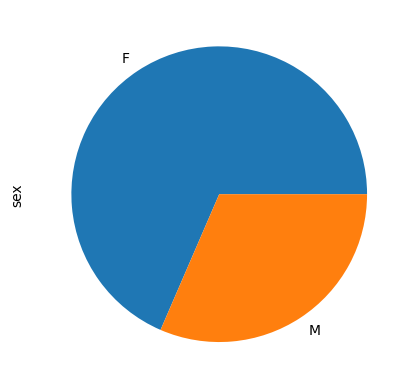

In [299]:
x['sex'].value_counts().plot.pie()

In [300]:
x['TBG'].fillna(0,inplace=True)
#In TBG most of the values were null, hence replaced by zero

In [301]:
x['sex'] = x['sex'].map({'F' : 0, 'M' : 1})


In [302]:
cols= x.loc[:,~x.columns.isin(['age','sex','TSH','T3','TT4','T4U','FTI','TBG','referral_source','target'])]

In [303]:
for c in cols:
    x[c] = x[c].map({'f' : 0, 't' : 1})

In [304]:
x['age'].value_counts()

60       209
62       208
72       207
59       201
61       192
        ... 
3          2
455        1
65511      1
65512      1
65526      1
Name: age, Length: 100, dtype: int64

In [306]:
x['target']=y

In [307]:
x.drop_duplicates()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
0,29,0.0,0,0,0,0,0,0,0,1,...,0,NaN,0,NaN,0,NaN,0,0,other,-
1,29,0.0,0,0,0,0,0,0,0,0,...,1,128,0,NaN,0,NaN,0,0,other,-
2,41,0.0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,11,other,-
3,36,0.0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,26,other,-
4,32,0.0,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,NaN,1,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,1.0,0,0,0,0,0,0,0,0,...,1,64,1,0.83,1,77,0,0,SVI,-
9168,22,1.0,0,0,0,0,0,0,0,0,...,1,91,1,0.92,1,99,0,0,SVI,-
9169,69,1.0,0,0,0,0,0,0,0,0,...,1,113,1,1.27,1,89,0,0,SVI,I
9170,47,0.0,0,0,0,0,0,0,0,0,...,1,75,1,0.85,1,88,0,0,other,-


In [308]:
indexAge = x[ (x['age'] >= 125) ].index
x.drop(indexAge , inplace=True)


In [311]:
x.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2603
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                       0
referral_source           0
target                    0
dtype: int64

In [312]:
x['TT4'].fillna(x['TT4'].median(), inplace=True)
x['T4U'].fillna(x['T4U'].median(), inplace=True)
x['FTI'].fillna(x['FTI'].median(), inplace=True)
x['T3'].fillna(x['T3'].median(), inplace=True)
x['TSH'].fillna(x['TSH'].median(), inplace=True)
x['sex'].fillna(x['sex'].median(), inplace=True)


In [313]:
x['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [314]:
x['referral_source'] = x['referral_source'].map({'other' : 0, 'SVI' : 1, 'SVHC':2, 'STMW':3, 'SVHD':4, 'WEST':5})


In [315]:
y = x['target']
x = x.drop('target',axis=1)

In [513]:
y.unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

<AxesSubplot:>

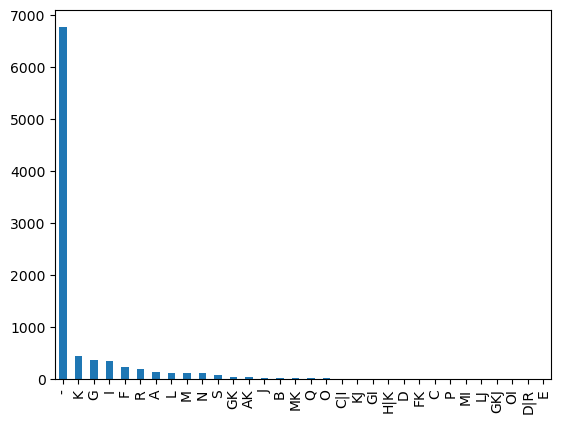

In [316]:
y.value_counts().plot.bar()

In [317]:
import scipy.stats as stats

In [318]:
gender_effect= pd.crosstab(x['sex'],y)

In [319]:
gender_effect

target,-,A,AK,B,C,C|I,D,D|R,E,F,...,M,MI,MK,N,O,OI,P,Q,R,S
sex,,,,,,,,,,,,,,,,,,,,,
0.0,4543,114,42,16,6,12,8,0,1,181,...,85,2,11,97,14,1,4,13,118,83
1.0,2224,33,4,5,0,0,0,1,0,52,...,26,0,5,13,0,0,1,1,78,2


In [320]:
observed=gender_effect.values
observed

array([[4543,  114,   42,   16,    6,   12,    8,    0,    1,  181,    6,
         279,    9,   36,    1,    6,  316,   15,  258,    8,   93,    0,
          85,    2,   11,   97,   14,    1,    4,   13,  118,   83],
       [2224,   33,    4,    5,    0,    0,    0,    1,    0,   52,    0,
          80,    1,   13,    0,    2,   30,   15,  178,    3,   22,    1,
          26,    0,    5,   13,    0,    0,    1,    1,   78,    2]],
      dtype=int64)

In [321]:
val=stats.chi2_contingency(gender_effect)

In [322]:
expected=val[3]

In [323]:
r=len(gender_effect)
c=len(gender_effect.iloc[0])
deg_of_f = (r-1)*(c-1)
alpha=0.05

In [324]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed,expected)])
chi_square_statistic=chi_square[0]+chi_square[1]
     

In [325]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=deg_of_f)
p_value

0.8360465382088247

In [326]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
     

Retain H0,There is no relationship between 2 categorical variables


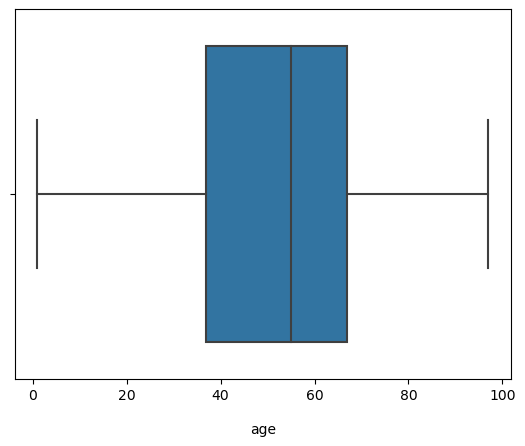

In [327]:
import matplotlib.pyplot as plt
ax = sns.boxplot(x=x['age'])
plt.xlabel("age", labelpad=14);

(array([ 29.,  20., 115., 296., 361., 595., 597., 672., 594., 488., 619.,
        879., 974., 783., 714., 753., 393., 222.,  49.,  15.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ,
        53.8, 58.6, 63.4, 68.2, 73. , 77.8, 82.6, 87.4, 92.2, 97. ]),
 <BarContainer object of 20 artists>)

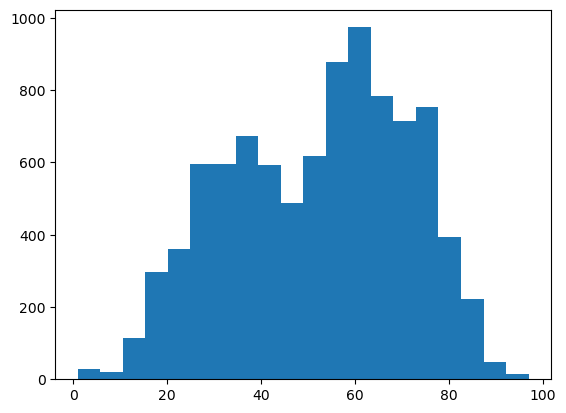

In [328]:
plt.hist(x['age'], bins=20)



<AxesSubplot:>

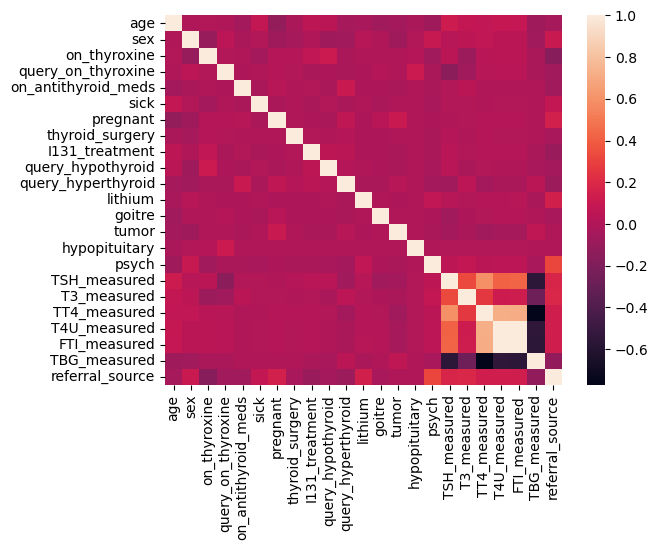

In [329]:
sns.heatmap(x.corr())

In [330]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

In [331]:
data_constant = constant_filter.fit_transform(x)
print(data_constant.shape)


(9168, 29)


In [332]:
constant_columns = [column for column in x.columns
                    if column not in x.columns[constant_filter.get_support()]]


In [334]:
for column in constant_columns:
    print(column)


In [335]:
#remove referrals source
x.drop('referral_source', axis=1,inplace=True)

In [336]:
qcons_filter = VarianceThreshold(threshold=0.01)


In [337]:
data_qcons = qcons_filter.fit_transform(x)
print(data_qcons.shape)

(9168, 26)


In [338]:
qcons_columns = [column for column in x.columns
                    if column not in x.columns[qcons_filter.get_support()]]


In [339]:
for column in qcons_columns:
    print(column)

goitre
hypopituitary


In [340]:
#removing quasi similar features
x_fil = x.drop(['goitre', 'hypopituitary'],axis=1)

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [138]:
x_train

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source
2952,43,0.0,0,0,0,0,0,0,0,0,...,1.3,1,136,1,0.97,1,140,0,0,1
7223,54,0.0,0,0,0,1,0,1,0,0,...,2.3,1,161,1,1.04,1,155,0,0,4
3063,83,0.0,0,0,0,0,0,0,0,0,...,1.3,1,100,1,0.86,1,117,0,0,1
2223,74,1.0,0,0,0,0,0,0,0,0,...,2,1,113,1,0.97,1,116,0,0,1
100,38,1.0,0,0,0,0,0,0,0,0,...,1.9,1,308,1,0.87,1,354,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,1.0,1,0,0,0,0,0,0,0,...,1.9,1,123,1,1.02,1,120,0,0,0
5191,89,0.0,0,0,0,0,0,0,0,0,...,1.8,1,86,1,1.04,1,83,0,0,0
5390,48,0.0,0,0,0,0,0,0,0,0,...,0.9,1,105,1,0.61,1,173,0,0,1
860,77,0.0,0,0,0,0,0,0,0,1,...,1.4,1,134,1,1.09,1,123,0,0,0


In [130]:
y_train


2952    -
7223    -
3063    -
2223    -
100     A
       ..
5734    -
5191    -
5390    -
860     G
7270    F
Name: target, Length: 6879, dtype: object

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
model=LogisticRegression()

In [139]:
model.fit(x_train, y_train)

C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
from sklearn.svm import SVC
svm_classifier=SVC(kernel='rbf')
svm_classifier.fit(x_train,y_train)
y_pred=svm_classifier.predict(x_test)

In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.7400784997819451


In [156]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(x_train,y_train)
y_pred_rf=rf_classifier.predict(x_test)



In [ ]:
rf_classifier.get_params()

In [157]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred_rf)
acc=accuracy_score(y_test,y_pred_rf)
print(acc)

0.9393807239424335


In [158]:
params={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [161]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [164]:
y_pred_rfrandom=rf_random.predict(x_test)
acc=accuracy_score(y_test,y_pred_rfrandom)
print(acc)


0.9424334932402966


In [165]:
rf_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [166]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [167]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(x_train,y_train)
y_predk = knnclf.predict(x_test)


C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [168]:
acc=accuracy_score(y_test,y_predk)
print(acc)


0.7828172699520279


In [169]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lrclf = lr.fit(x_train,y_train)
y_predlr = lrclf.predict(x_test)
accuracy_score(y_pred,y_test)


C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7400784997819451

In [341]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_fil,y, test_size=0.25, random_state=42)

In [342]:
from sklearn.linear_model import LogisticRegression
lr_fil = LogisticRegression(max_iter=1000)
lrclff= lr_fil.fit(x_train,y_train)
y_predlrf = lrclff.predict(x_test)
accuracy_score(y_predlrf,y_test)

C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8398778359511344

In [351]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en= x['target'].values
X_en = labelencoder.fit_transform(X_en)
x.drop('target',axis=1)
x["target"] = X_en


In [372]:
x_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9168 entries, 0 to 9171
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9168 non-null   int64  
 1   sex                  9168 non-null   float64
 2   on_thyroxine         9168 non-null   int64  
 3   query_on_thyroxine   9168 non-null   int64  
 4   on_antithyroid_meds  9168 non-null   int64  
 5   sick                 9168 non-null   int64  
 6   pregnant             9168 non-null   int64  
 7   thyroid_surgery      9168 non-null   int64  
 8   I131_treatment       9168 non-null   int64  
 9   query_hypothyroid    9168 non-null   int64  
 10  query_hyperthyroid   9168 non-null   int64  
 11  lithium              9168 non-null   int64  
 12  goitre               9168 non-null   int64  
 13  tumor                9168 non-null   int64  
 14  hypopituitary        9168 non-null   int64  
 15  psych                9168 non-null   i

In [388]:
x_fil.TBG=x.TBG.astype(float)
x_fil.FTI=x.FTI.astype(float)
x_fil.TSH=x.TSH.astype(float)
x_fil.T4U=x.T4U.astype(float)
x_fil.T3=x.T3.astype(float)
x_fil.TT4=x.TT4.astype(float)

In [390]:
x_fil['target']=X_en

In [393]:
imp = x_fil.drop("target", axis=1).apply(lambda a: a.corr(x_fil.target))
#print(imp)
indices = np.argsort(imp)
#print(indices)
print(imp[indices])   

T3                    -0.118198
sex                   -0.066404
TT4_measured          -0.056053
psych                 -0.048895
FTI_measured          -0.030150
T4U_measured          -0.029153
lithium               -0.025632
query_hyperthyroid    -0.014830
sick                  -0.005548
tumor                 -0.001141
query_on_thyroxine     0.003021
I131_treatment         0.008419
TSH_measured           0.013667
on_antithyroid_meds    0.014315
T3_measured            0.016231
age                    0.018143
thyroid_surgery        0.018159
query_hypothyroid      0.036389
T4U                    0.047674
pregnant               0.088264
TBG_measured           0.091675
FTI                    0.109634
TT4                    0.112491
TSH                    0.113489
on_thyroxine           0.140978
TBG                    0.177784
dtype: float64


In [398]:
for i in range(0, len(indices)):
    if np.abs(imp[i])>0.1:
        print(imp[i])


0.14097769121094256
0.113488815783442
-0.11819770485367774
0.1124907674554168
0.10963375856120237
0.17778352969869796


FTI,TT4,TSH,on_thyroxine,TBG,T3 have correlation with target variable more than 0.1

In [389]:
x_c=x_fil.copy()

In [420]:
x_co= pd.DataFrame([x.FTI, x.TT4, x.TSH, x.on_thyroxine, x.TBG, x.T3, x.target])

In [422]:
x_co.T

,FTI,TT4,TSH,on_thyroxine,TBG,T3,target
0,109.0,104.0,0.3,0.0,0.0,1.9,0.0
1,109.0,128.0,1.6,0.0,0.0,1.9,0.0
2,109.0,104.0,1.4,0.0,11.0,1.9,0.0
3,109.0,104.0,1.4,0.0,26.0,1.9,0.0
4,109.0,104.0,1.4,0.0,36.0,1.9,31.0
...,...,...,...,...,...,...,...
9167,77.0,64.0,1.4,0.0,0.0,1.9,0.0
9168,99.0,91.0,1.4,0.0,0.0,1.9,0.0
9169,89.0,113.0,1.4,0.0,0.0,1.9,16.0
9170,88.0,75.0,1.4,0.0,0.0,1.9,0.0


In [437]:
y_co=x_co.T['target']
x_co.drop('target', inplace=True)

In [438]:
x_co

,0,1,2,3,4,5,6,7,8,9,...,9162,9163,9164,9165,9166,9167,9168,9169,9170,9171
FTI,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0,...,67.0,100.0,85.0,115.0,119.0,77.0,99.0,89.0,88.0,65.0
TT4,104.0,128.0,104.0,104.0,104.0,104.0,104.0,116.0,76.0,83.0,...,84.0,94.0,67.0,76.0,88.0,64.0,91.0,113.0,75.0,66.0
TSH,0.3,1.6,1.4,1.4,1.4,1.4,1.4,0.7,1.2,1.9,...,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.4
on_thyroxine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TBG,0.0,0.0,11.0,26.0,36.0,26.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3,1.9,1.9,1.9,1.9,1.9,1.9,1.9,2.6,1.8,1.7,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9


In [448]:
from sklearn.model_selection import train_test_split
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_co.T,y_co, test_size=0.25, random_state=42)

In [450]:
y_train_f

5895     0.0
6852    16.0
2223     0.0
100      1.0
6429     2.0
        ... 
5736    11.0
5192     0.0
5391     0.0
860     11.0
7273    18.0
Name: target, Length: 6876, dtype: float64

In [443]:
from sklearn.linear_model import LogisticRegression
lr_feat_sel = LogisticRegression(max_iter=1000)
lrfs = lr_feat_sel.fit(x_train,y_train)
y_predfs = lrfs.predict(x_test)
accuracy_score(y_predfs,y_test)


C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8219895287958116

In [453]:
neighfs = KNeighborsClassifier(n_neighbors=3)
knnfs = neighfs.fit(x_train_f,y_train_f)
y_predfs = knnfs.predict(x_test_f)


C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [454]:
accuracy_score(y_predfs,y_test_f)


0.7953752181500873

In [456]:
from sklearn.svm import SVC
svm_classifierfs=SVC(kernel='rbf')
svm_classifierfs.fit(x_train_f,y_train_f)
y_pred_fs=svm_classifierfs.predict(x_test_f)

In [457]:
accuracy_score(y_pred_fs,y_test_f)
#74% with all features

0.7796684118673648

In [459]:
from sklearn.ensemble import RandomForestClassifier
rf_classifierfs=RandomForestClassifier()
rf_classifierfs.fit(x_train_f,y_train_f)
y_pred_rf_fs=rf_classifierfs.predict(x_test_f)



In [467]:
rf_classifierfs.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [460]:
accuracy_score(y_pred_rf_fs,y_test_f)
#93.9 with all features

0.9293193717277487

In [461]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomfs = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_randomfs.fit(x_train_f, y_train_f)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [462]:
y_pred_rfr_fs=rf_randomfs.predict(x_test_f)


In [463]:
accuracy_score(y_pred_rfr_fs,y_test_f)


0.9293193717277487

In [466]:
rf_randomfs.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [469]:
y_fil=x_fil['target']
x_fil.drop('target', axis=1)


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,29,0.0,0,0,0,0,0,0,0,1,...,0,1.9,0,104.0,0,0.96,0,109.0,0,0.0
1,29,0.0,0,0,0,0,0,0,0,0,...,1,1.9,1,128.0,0,0.96,0,109.0,0,0.0
2,41,0.0,0,0,0,0,0,0,0,0,...,0,1.9,0,104.0,0,0.96,0,109.0,1,11.0
3,36,0.0,0,0,0,0,0,0,0,0,...,0,1.9,0,104.0,0,0.96,0,109.0,1,26.0
4,32,0.0,0,0,0,0,0,0,0,0,...,0,1.9,0,104.0,0,0.96,0,109.0,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,1.0,0,0,0,0,0,0,0,0,...,0,1.9,1,64.0,1,0.83,1,77.0,0,0.0
9168,22,1.0,0,0,0,0,0,0,0,0,...,0,1.9,1,91.0,1,0.92,1,99.0,0,0.0
9169,69,1.0,0,0,0,0,0,0,0,0,...,0,1.9,1,113.0,1,1.27,1,89.0,0,0.0
9170,47,0.0,0,0,0,0,0,0,0,0,...,0,1.9,1,75.0,1,0.85,1,88.0,0,0.0


In [474]:
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(x_fil,y_fil, test_size=0.25, random_state=42)

In [475]:
lr_l = LogisticRegression(max_iter=1000)
lrl = lr_l.fit(x_train_l,y_train_l)
y_pred_l = lrl.predict(x_test_l)


C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [542]:
accuracy_score(y_pred_l,y_test_l)
print(classification_report(y_test_l,y_pred_l))  


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1673
           1       0.93      0.93      0.93        28
           2       1.00      1.00      1.00        11
           3       0.60      1.00      0.75         3
           4       0.00      0.00      0.00         3
           5       0.50      1.00      0.67         1
           9       0.96      0.86      0.91        51
          10       0.50      0.50      0.50         2
          11       0.91      0.96      0.94        85
          12       0.00      0.00      0.00         1
          13       0.75      0.86      0.80         7
          15       0.00      0.00      0.00         1
          16       0.92      0.96      0.94        97
          17       0.88      0.70      0.78        10
          18       0.96      0.99      0.98       139
          19       1.00      1.00      1.00         2
          20       0.92      0.86      0.89        28
          21       0.00    

C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\

In [480]:
neighl = KNeighborsClassifier(n_neighbors=3)
knnl = neighl.fit(x_train_l,y_train_l)
y_predlk = knnl.predict(x_test_l)
accuracy_score(y_predlk,y_test_l)


C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9197207678883071

In [541]:
print(classification_report(y_test_l,y_predlk))  


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1673
           1       0.52      0.61      0.56        28
           2       0.43      0.27      0.33        11
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           9       0.87      0.92      0.90        51
          10       0.00      0.00      0.00         2
          11       0.72      0.79      0.75        85
          12       0.00      0.00      0.00         1
          13       0.22      0.29      0.25         7
          15       0.00      0.00      0.00         1
          16       0.79      0.81      0.80        97
          17       0.67      0.60      0.63        10
          18       0.87      0.84      0.86       139
          19       0.25      0.50      0.33         2
          20       0.48    

C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\

In [482]:
from sklearn.svm import SVC
svm_classifierl=SVC(kernel='rbf')
svm_classifierl.fit(x_train_l,y_train_l)
y_pred_lsv=svm_classifierl.predict(x_test_l)

In [540]:
print(accuracy_score(y_pred_lsv,y_test_l))
print(classification_report(y_test_l,y_pred_lsv))  


0.9157940663176265
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1673
           1       0.50      0.71      0.59        28
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           9       0.83      0.88      0.86        51
          10       0.00      0.00      0.00         2
          11       0.74      0.94      0.83        85
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         1
          16       0.79      0.86      0.82        97
          17       0.00      0.00      0.00        10
          18       0.74      0.93      0.82       139
          19       0.00      0.00      0.00         2
          20       0.50      0.04      0.07        28
        

C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [485]:
from sklearn.ensemble import RandomForestClassifier
rf_classifierl=RandomForestClassifier()
rf_classifierl.fit(x_train_l,y_train_l)
y_pred_rf_l=rf_classifierl.predict(x_test_l)


In [486]:
accuracy_score(y_pred_rf_l,y_test_l)


0.9965095986038395

C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1673
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        11
           3       0.60      1.00      0.75         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         1
           9       1.00      1.00      1.00        51
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00        85
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         1
          16       0.98      1.00      0.99        97
          17       1.00      1.00      1.00        10
          18       0.99      1.00      0.99       139
          19       1.00      1.00      1.00         2
          20       0.96      0.89      0.93        28
          22       1.00    

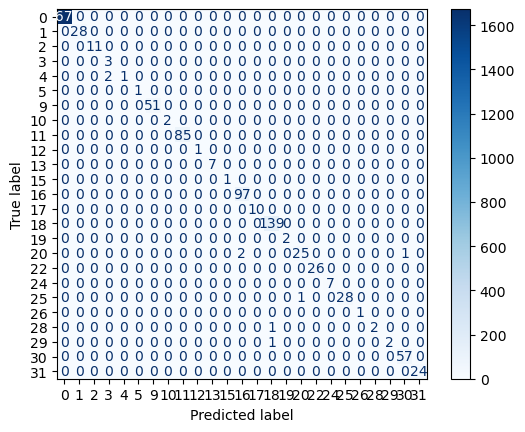

In [539]:
from sklearn.metrics import plot_confusion_matrix ,classification_report

plot_confusion_matrix(rf_classifierl,x_test_l,y_test_l,cmap=plt.cm.Blues)
print(classification_report(y_test_l,y_pred_rf_l))  


In [545]:
import tensorflow as tf


In [546]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [547]:
model = tf.keras.models.Sequential()


In [550]:
x_test.shape

(2292, 6)

In [564]:
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (6,)))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'softmax'))



In [565]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])


In [566]:
model.fit(x_train, y_train, epochs =15)


Epoch 1/15
215/215 [==============================] - 11s 34ms/step - loss: 1.1483 - sparse_categorical_accuracy: 0.7707
Epoch 2/15
215/215 [==============================] - 7s 34ms/step - loss: 0.7559 - sparse_categorical_accuracy: 0.7898
Epoch 3/15
215/215 [==============================] - 7s 32ms/step - loss: 0.6998 - sparse_categorical_accuracy: 0.8008
Epoch 4/15
215/215 [==============================] - 7s 32ms/step - loss: 0.6875 - sparse_categorical_accuracy: 0.7996
Epoch 5/15
215/215 [==============================] - 7s 32ms/step - loss: 0.6714 - sparse_categorical_accuracy: 0.8031
Epoch 6/15
215/215 [==============================] - 7s 31ms/step - loss: 0.6507 - sparse_categorical_accuracy: 0.8024
Epoch 7/15
215/215 [==============================] - 5s 25ms/step - loss: 0.6422 - sparse_categorical_accuracy: 0.8019
Epoch 8/15
215/215 [==============================] - 6s 30ms/step - loss: 0.5992 - sparse_categorical_accuracy: 0.8159
Epoch 9/15
215/215 [===================

In [567]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)


72/72 [==============================] - 1s 7ms/step - loss: 0.5317 - sparse_categorical_accuracy: 0.8277


In [570]:
model_fs = tf.keras.models.Sequential()
model_fs.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (27,)))
model_fs.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model_fs.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model_fs.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model_fs.add(tf.keras.layers.Dense(units = 32, activation = 'softmax'))




In [571]:
model_fs.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])


In [572]:
model_fs.fit(x_train_l, y_train_l, epochs =15)


Epoch 1/15
215/215 [==============================] - 6s 18ms/step - loss: 0.8146 - sparse_categorical_accuracy: 0.8426
Epoch 2/15
215/215 [==============================] - 4s 17ms/step - loss: 0.3875 - sparse_categorical_accuracy: 0.9085
Epoch 3/15
215/215 [==============================] - 4s 18ms/step - loss: 0.3037 - sparse_categorical_accuracy: 0.9172
Epoch 4/15
215/215 [==============================] - 3s 13ms/step - loss: 0.2715 - sparse_categorical_accuracy: 0.9241
Epoch 5/15
215/215 [==============================] - 4s 17ms/step - loss: 0.2298 - sparse_categorical_accuracy: 0.9295
Epoch 6/15
215/215 [==============================] - 4s 17ms/step - loss: 0.2060 - sparse_categorical_accuracy: 0.9340
Epoch 7/15
215/215 [==============================] - 3s 15ms/step - loss: 0.1927 - sparse_categorical_accuracy: 0.9322
Epoch 8/15
215/215 [==============================] - 3s 16ms/step - loss: 0.1895 - sparse_categorical_accuracy: 0.9373
Epoch 9/15
215/215 [====================

In [575]:
test_loss, test_accuracy = model_fs.evaluate(x_test_l, y_test_l)


72/72 [==============================] - 1s 7ms/step - loss: 0.0809 - sparse_categorical_accuracy: 0.9729


In [577]:
pip install xgboost


     ---------------------------------------- 89.1/89.1 MB 9.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [580]:
import xgboost as xgb 
from xgboost import XGBClassifier


In [581]:
learn = XGBClassifier()  #6 features
learn.fit(x_train, y_train)
print (learn)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


In [582]:
pred = learn.predict(x_test)


In [583]:
accuracy_score(pred,y_test)

0.9245200698080279

In [591]:
print(classification_report(y_test,pred))  


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1673
         1.0       0.72      0.93      0.81        28
         2.0       0.67      0.36      0.47        11
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         1
         9.0       0.92      0.94      0.93        51
        10.0       1.00      0.50      0.67         2
        11.0       0.93      0.99      0.96        85
        12.0       0.00      0.00      0.00         1
        13.0       0.70      1.00      0.82         7
        15.0       0.00      0.00      0.00         1
        16.0       0.75      0.69      0.72        97
        17.0       0.60      0.30      0.40        10
        18.0       0.88      0.89      0.89       139
        19.0       1.00      0.50      0.67         2
        20.0       0.72      0.64      0.68        28
        22.0       0.96    

C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [585]:
learnl = XGBClassifier() #after filter based features
learnl.fit(x_train_l, y_train_l)
print (learnl)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


In [588]:
pred_l = learnl.predict(x_test_l)


In [589]:
accuracy_score(pred_l,y_test_l)

0.9986910994764397

In [590]:
print(classification_report(y_test_l,pred_l))  


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1673
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        11
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           9       0.98      1.00      0.99        51
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00        85
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         7
          15       0.00      0.00      0.00         1
          16       0.99      1.00      0.99        97
          17       1.00      1.00      1.00        10
          18       1.00      1.00      1.00       139
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00        28
          22       1.00    

C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mindstix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [609]:
from sklearn.metrics import mean_squared_error
import math
def fitness_function(position):
 svclassifier = SVC(kernel='rbf', gamma = position[0].all(), C = position[1].all())
 svclassifier.fit(x_train, y_train)
 y_train_pred = svclassifier.predict(x_train)
 y_test_pred = svclassifier.predict(x_test)
 mse_f =mean_squared_error(y_test, y_test_pred)
 rmse_f = math.sqrt(mse_f)
 return rmse_f



In [603]:
pip install pyswarms


     ------------------------------------ 104.1/104.1 kB 545.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [610]:
import pyswarms as ps
lb = [10, 0.0001]
ub = [1000,0.1]
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
gamma_opt, C_opt = optimizer.optimize(fitness_function, iters=10)

2022-12-14 13:31:14,729 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|10/10, best_cost=0.736
2022-12-14 13:56:11,049 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7356020942408377, best pos: [6.90837550e+02 2.94022619e-02]


In [611]:
!pip install pgmpy

     ---------------------------------------- 1.9/1.9 MB 10.2 MB/s eta 0:00:00
     -------------------------------------- 167.2/167.2 MB 5.6 MB/s eta 0:00:00
